# Exploratory Data Analysis of Sports I.P.L


> By Shashwat Dev

### In this project, we will analyse the data of different IPL Matches 


## Preparing the Environment
We will import the required libraries and read in the data set.
*   Pandas - Data manipulation
*   Matplotlib and Seaborn - Data visualisation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

## Loading and understanding the data

In [ ]:
# Loading the "matches" dataset
matches = pd.read_csv("matches.csv")

In [ ]:
# import first 5 rows
display(matches.head())

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# checking the dimension (num of rows and columns) of dataset
print("matches data shape(Rows, Columns) :", matches.shape)

matches data shape(Rows, Columns) : (756, 18)


In [ ]:
# check dataframe structures like columns and its counts, datatypes & Null Values
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
matches.dtypes.value_counts()

object    13
int64      5
dtype: int64

In [ ]:
# Gives number of data points in each variable
matches.count()

id                 756
season             756
city               749
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             752
win_by_runs        756
win_by_wickets     756
player_of_match    752
venue              756
umpire1            754
umpire2            754
umpire3            119
dtype: int64

## Clean the data

### Dealing Missing Values

In [ ]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

umpire3 contains too much missing data and must be dropped

In [ ]:
matches.drop('umpire3', axis=1, inplace=True)

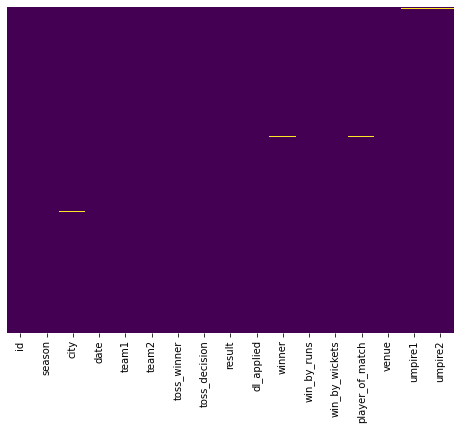

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(matches.isnull(), yticklabels=False, cbar=False, cmap='viridis')

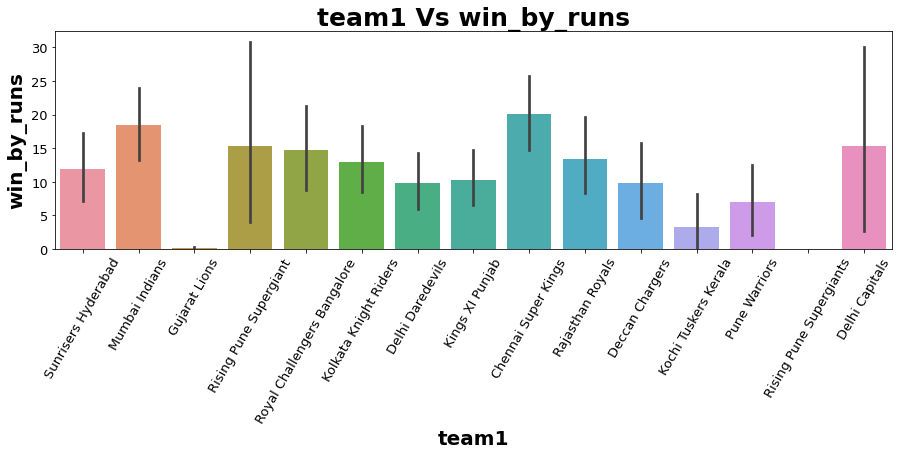

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x=matches['team1'], y=matches['win_by_runs'], data=matches)

plt.title('team1 Vs win_by_runs', fontsize=25, fontweight='bold')

plt.xlabel('team1', fontsize=20, fontweight='bold')
plt.ylabel('win_by_runs', fontsize=20, fontweight='bold')

plt.xticks(rotation=60, fontsize=13)
plt.yticks(fontsize=13)

plt.show()

We observe two teams Rising Pune Supergiant and Rising Pune Supergiants. Since both are the same team so we replace Rising Pune Supergiant with Rising Pune Supergiants

In [ ]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [ ]:
matches.loc[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [ ]:
matches['city'].fillna('Dubai', inplace = True)

In [ ]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

### There are two familiar statement; 'Bengaluru' and 'Bengalore'

In [ ]:
matches.replace('Bengaluru','Bangalore', inplace = True)

### Finding Outliers

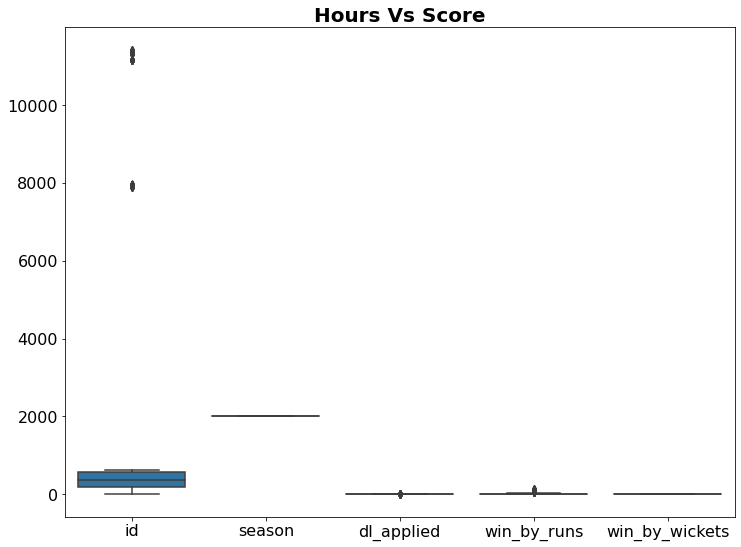

In [ ]:
plt.figure(figsize=(12,9))
sns.boxplot(data=matches)

plt.title("Hours Vs Score", fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

### Skew and Kurtosis

In [ ]:
matches.skew()

id                2.011636
season            0.060337
dl_applied        6.079627
win_by_runs       2.551532
win_by_wickets    0.270236
dtype: float64

Text(0.5, 1.0, 'Skew:2.5515324662601824')

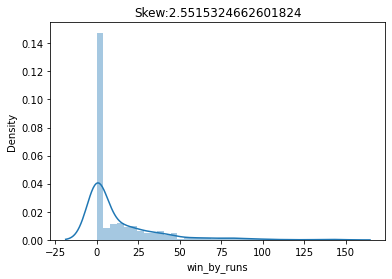

In [ ]:
sns.distplot(matches['win_by_runs'])
Skew_win_by_runs = matches['win_by_runs'].skew()
plt.title("Skew:"+str(Skew_win_by_runs))

Text(0.5, 1.0, 'Skew:0.27023620574294677')

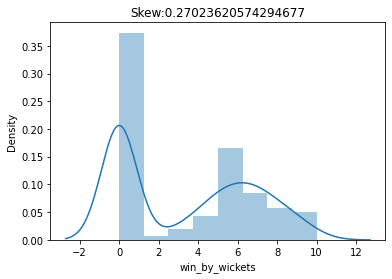

In [ ]:
sns.distplot(matches['win_by_wickets'])
Skew_win_by_wickets = matches['win_by_wickets'].skew()
plt.title("Skew:"+str(Skew_win_by_wickets))

### Analysis of Relationship between variables

i) Correlation with the variable of interest

In [ ]:
matches.corr()['win_by_runs']

id               -0.039403
season           -0.037529
dl_applied       -0.016349
win_by_runs       1.000000
win_by_wickets   -0.560420
Name: win_by_runs, dtype: float64

ii) Heatmap

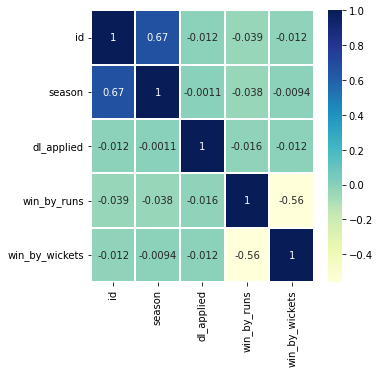

In [ ]:
plt.figure(figsize=(5,5)) 
sns.heatmap(matches.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

### Data Visualisation

i) Univariate Analysis

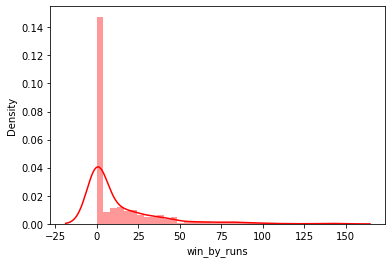

In [ ]:
sns.distplot(matches['win_by_runs'], color = 'red')
plt.show()

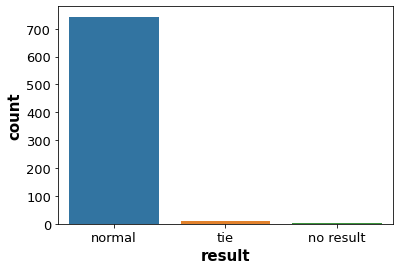

In [ ]:
sns.countplot('result',data=matches)

plt.xlabel('result', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

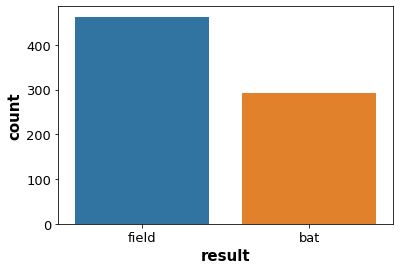

In [ ]:
sns.countplot('toss_decision', data=matches)

plt.xlabel('result', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

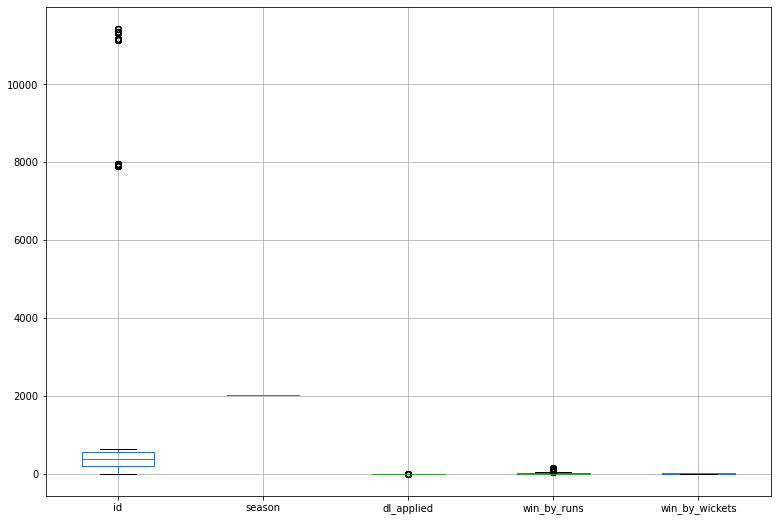

In [ ]:
plt.figure(figsize = (13, 9)) 
matches.boxplot()
plt.show()

## ii) Bivariate Analysis

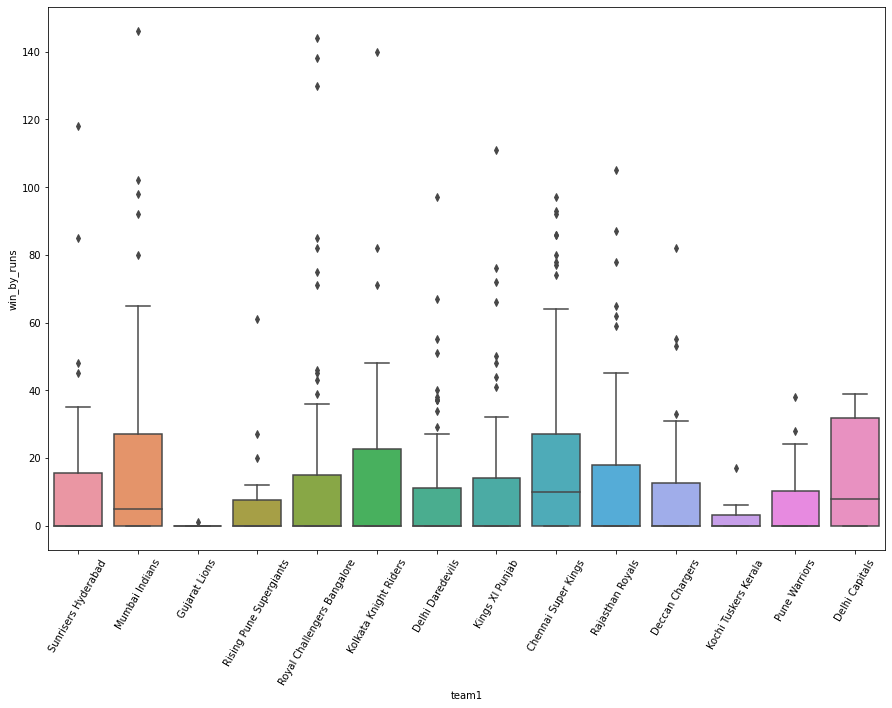

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=matches, x='team1', y='win_by_runs')
plt.xticks(rotation=60)
plt.show()

In [ ]:
# descriptive statistics
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
# Getting the frequency of most man of the match awards
matches['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [ ]:
# Getting the top 10 players with most man of the match awards
matches['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [ ]:

# Getting the top 5 players with most man of the match awards
matches['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [ ]:
list(matches['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner']

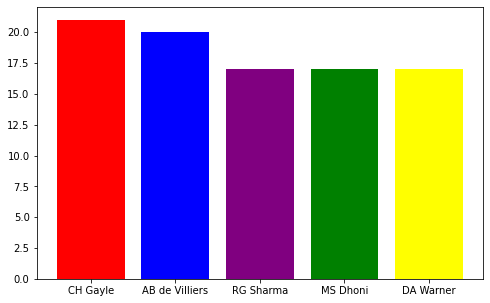

In [ ]:
# Making a bar plot for the top 5 players with most man of the match awards
plt.figure(figsize=(8,5))
plt.bar(list(matches['player_of_match'].value_counts()[0:5].keys()), list(matches['player_of_match'].value_counts()[0:5]), color=['red', 'blue', 'purple', 'green', 'yellow'])
plt.show()

In [ ]:
# Getting the frequency of result column
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [ ]:
# Finding out the number of toss wins w.r.t each team
matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

In [ ]:
# Extracting the records where a team won batting first
batting_first = matches[matches['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


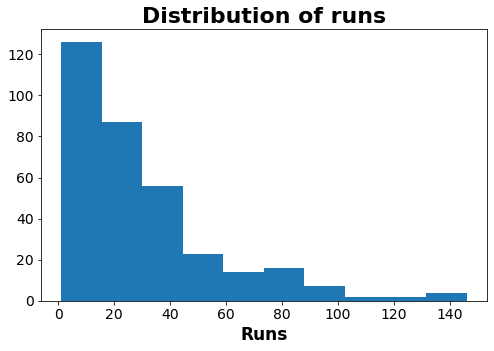

In [ ]:
# Making a Histogram
plt.figure(figsize=(8,5))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of runs",fontsize=22,fontweight='bold')
plt.xlabel("Runs",fontsize=17,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# Finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

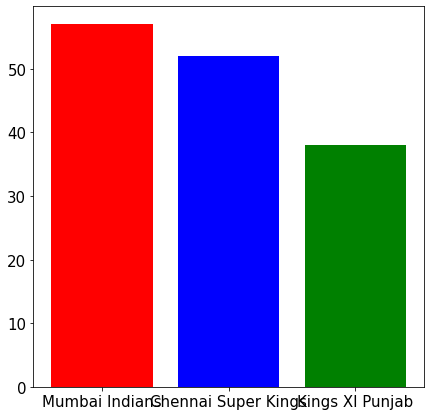

In [ ]:
# Making a bar plot for top 3 teams with most wins after batting first
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()), list(batting_first['winner'].value_counts()[0:3]), color=['red', 'blue', 'green'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

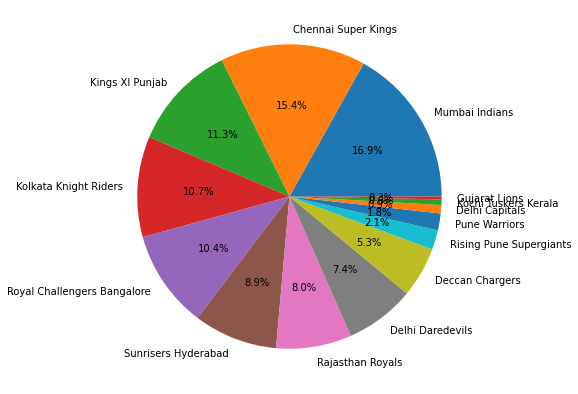

In [ ]:
# Making a pie chart
plt.figure(figsize=(10,7))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [ ]:
# Extracting those records where a team has won after batting second
batting_second = matches[matches['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


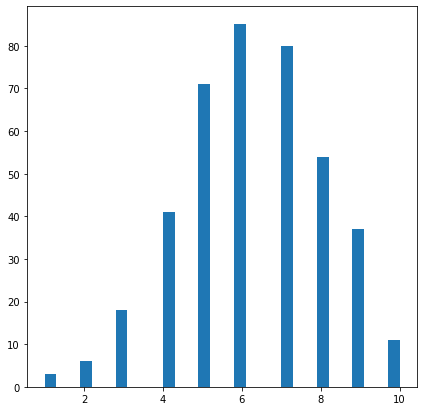

In [ ]:
# Making a Histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'], bins=30)
plt.show()

In [ ]:
# Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

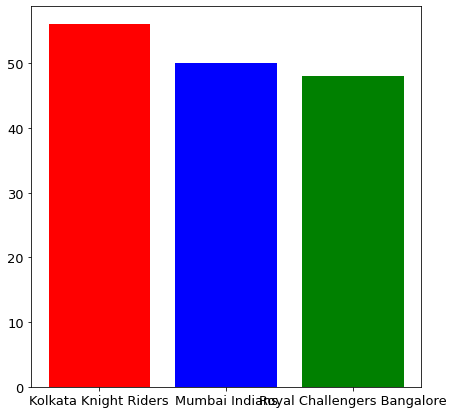

In [ ]:
# Making a bar plot for top 3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()), list(batting_second['winner'].value_counts()[0:3]), color=['red', 'blue', 'green'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

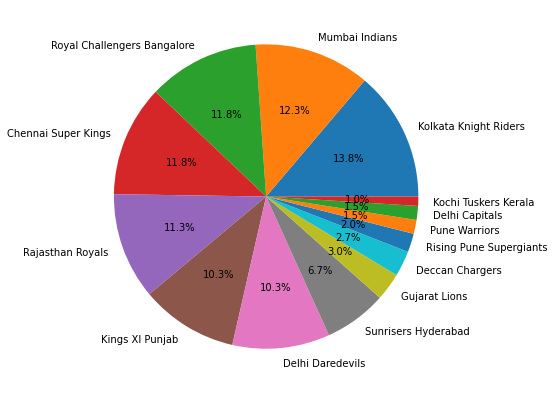

In [ ]:
# Making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [ ]:
# Looking at the number of matches played each season
matches['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [ ]:
# Looking at the number of matches played in each city
matches['city'].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Dubai               7
Abu Dhabi           7
Ranchi              7
Port Elizabeth      7
Cuttack             7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
# Finding out how many times a team has won the match after winning the toss 
np.sum(matches['toss_winner']==matches['winner'])

393

City with respect to number of IPL matches which took place

In [ ]:
matches['city'].nunique()

32

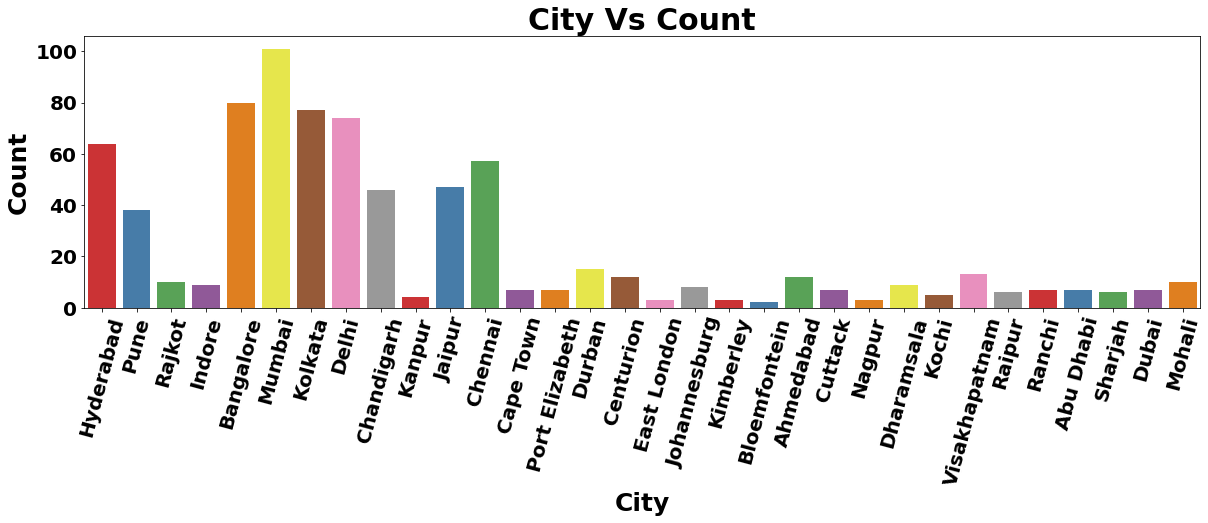

In [ ]:
plt.figure(figsize=(20,5))

cols = ['yellowgreen', 'lightcoral','gold']
sns.countplot(matches['city'],data=matches, palette='Set1')

plt.xlabel('City', fontsize=25, fontweight='bold')
plt.ylabel('Count', fontsize=25, fontweight='bold')

plt.title('City Vs Count', fontweight="bold", size=30)

plt.xticks(rotation=75, fontweight="bold", fontsize=20)
plt.yticks(fontweight="bold", fontsize=20)

plt.show()

In [ ]:
matches.loc[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


## Amount of matches

In [ ]:
# Number of matches
matches['id'].max()

11415

## Amount of seasons

In [ ]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [ ]:
# Number of seasons
len(matches['season'].unique())

12

## Team won by maximum runs:

In [ ]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

## Team won by minimum runs:

In [ ]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

## Team won by maximum wickets:

In [ ]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

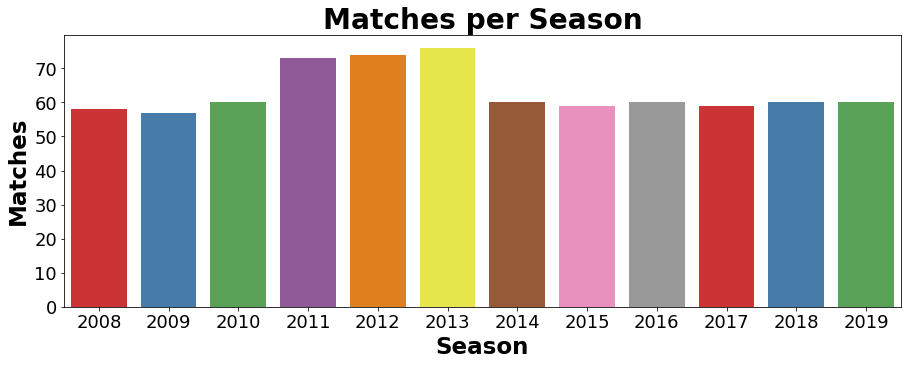

In [ ]:
# Matches per season
plt.subplots(figsize=(15,5))

sns.countplot(x = 'season', data = matches, palette='Set1')

plt.title('Matches per Season', fontsize=28, fontweight='bold')

plt.xlabel('Season', fontsize=23, fontweight='bold')
plt.ylabel('Matches', fontsize=23, fontweight='bold')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

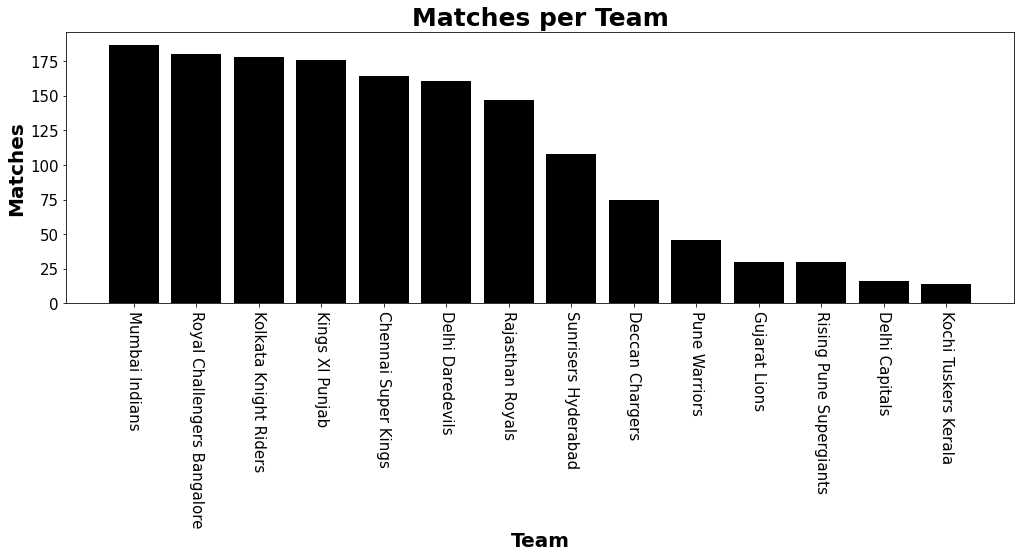

In [ ]:
# Matches per team
num_matches = pd.concat([matches['team1'], matches['team2']])
num_matches = num_matches.value_counts()

plt.figure(figsize=(17,5))

plt.bar(x=num_matches.index, height=num_matches.values, color='black')

plt.title('Matches per Team', fontsize=25, fontweight='bold')

plt.xlabel('Team', fontsize=20, fontweight='bold')
plt.ylabel('Matches', fontsize=20, fontweight='bold')

plt.xticks(rotation=270, fontsize=15)
plt.yticks(fontsize=15)
    
plt.show()

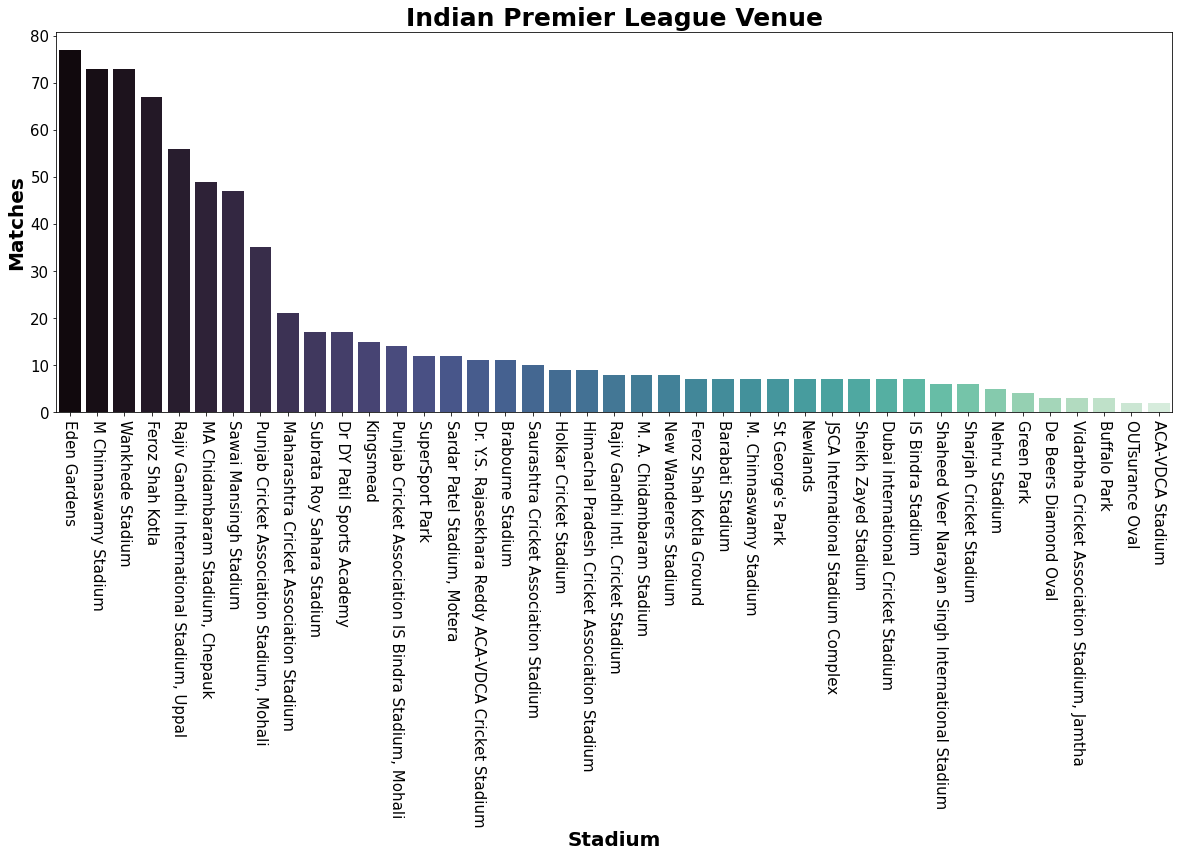

In [ ]:
# Visualization of how many matches were played in which venue.
plt.subplots(figsize=(20,7))

sns.countplot(x ='venue', data=matches, palette='mako', order=matches['venue'].value_counts().index)

plt.title('Indian Premier League Venue',fontsize=25, fontweight='bold')

plt.xlabel('Stadium', fontsize=20, fontweight='bold')
plt.ylabel('Matches', fontsize=20, fontweight='bold')

plt.xticks(rotation=270, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [ ]:
season_winner = matches.drop_duplicates('season', keep='last')
seasonw = season_winner[['season', 'winner']]
seasonw.sort_values('season',inplace=True)
seasonw.reset_index(inplace=True, drop=True)

In [ ]:
print(seasonw)

    season                 winner
0     2008       Rajasthan Royals
1     2009        Deccan Chargers
2     2010    Chennai Super Kings
3     2011    Chennai Super Kings
4     2012  Kolkata Knight Riders
5     2013         Mumbai Indians
6     2014  Kolkata Knight Riders
7     2015         Mumbai Indians
8     2016    Sunrisers Hyderabad
9     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians


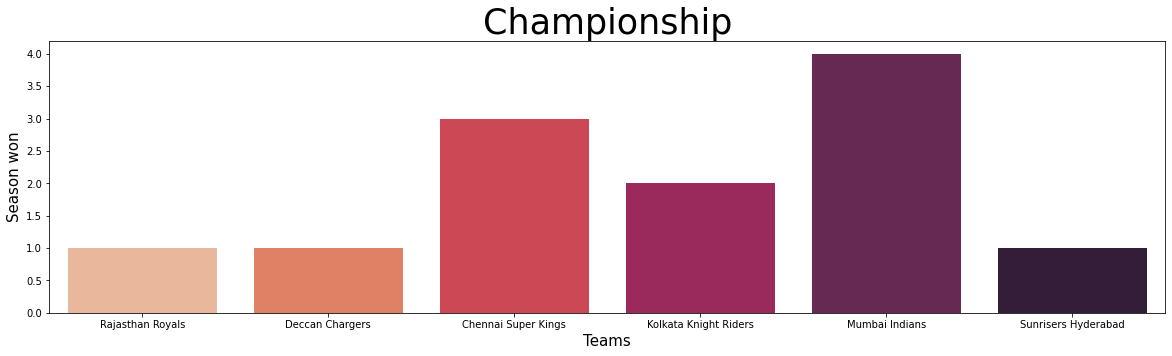

In [ ]:
# Championships per Team
plt.subplots(figsize=(20,5))

sns.countplot('winner', data = seasonw, palette = 'rocket_r')

plt.title('Championship',fontsize=35)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Season won',fontsize=15)

plt.show()

In [ ]:
top_players = matches['player_of_match'].value_counts()[:10]

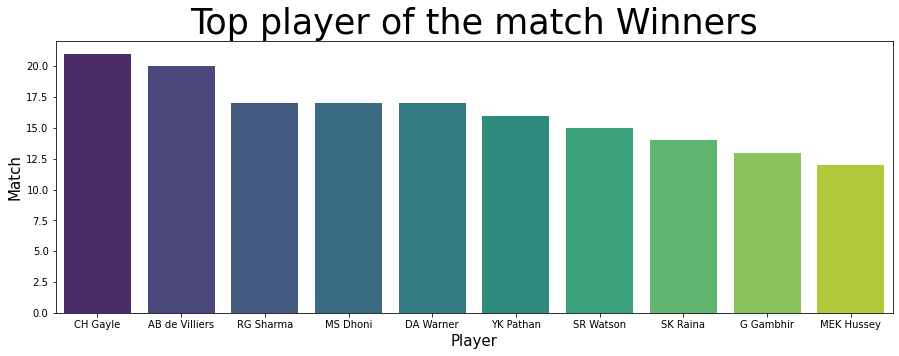

In [ ]:
# Top 10 players
plt.figure(figsize=(15,5))

sns.barplot(x=top_players.index, y=top_players, palette="viridis")

plt.title('Top player of the match Winners', fontsize=35)
plt.xlabel('Player', fontsize=15)
plt.ylabel('Match', fontsize=15)

plt.show()

### Dataset-Deliveries

In [ ]:
# Loading the "deliveries" dataset
deliveries = pd.read_csv("deliveries.csv")

In [ ]:
# import first 5 rows
display(deliveries.head())

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN



> This dataset gives ball by ball information of each match.




In [ ]:
# checking dimension (num of rows and columns) of dataset
print("deliveries data shape (Rows, Columns):", deliveries.shape)

deliveries data shape (Rows, Columns): (179078, 21)


In [ ]:
# check dataframe structure like columns and its counts, datatypes & Null Values
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
deliveries.dtypes.value_counts()

int64     13
object     8
dtype: int64

In [ ]:
# Gives number of data points in each variable
deliveries.count()

match_id            179078
inning              179078
batting_team        179078
bowling_team        179078
over                179078
ball                179078
batsman             179078
non_striker         179078
bowler              179078
is_super_over       179078
wide_runs           179078
bye_runs            179078
legbye_runs         179078
noball_runs         179078
penalty_runs        179078
batsman_runs        179078
extra_runs          179078
total_runs          179078
player_dismissed      8834
dismissal_kind        8834
fielder               6448
dtype: int64

In [ ]:
# descriptive statistics
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


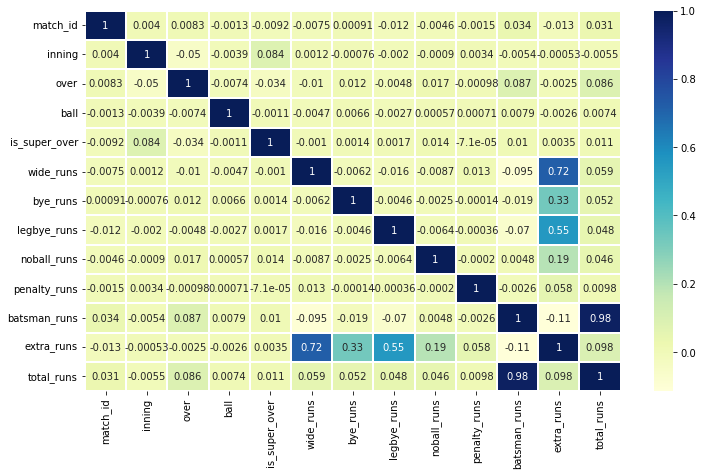

In [ ]:
plt.figure(figsize=(12,7)) 
sns.heatmap(deliveries.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

## Cleaning the data

In [ ]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

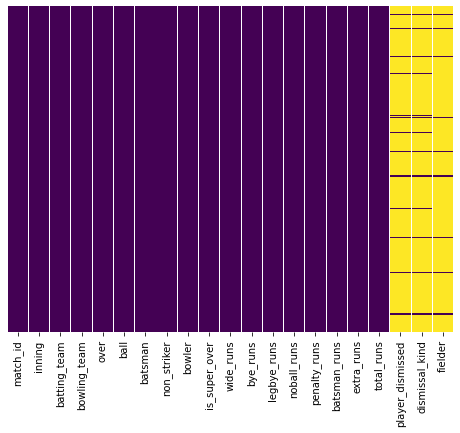

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(deliveries.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [ ]:
# Analyzing match b/n Sunrisers Hyderabad & Royal Challengers Bangalore
match_1 = deliveries[deliveries['match_id']==1]
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
match_1.shape

(248, 21)

*   248 rows means: Normally in 20:20 match 20 overs per side.
*   20*6=120 balls per side. 120+120=240 balls per match.
*   Remaining 8 are extras in the match.wides / no balls / extras / bys / legbys.

In [ ]:
# Sunrisers Hyderabad
srh = match_1[match_1['inning']==1]

In [ ]:
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In entire innings of Sunrisers Hyderabad batsman scores as below
*   57 ---> Singles
*   32 ---> Dot balls
*   17 ---> 4's
*   9 ---> 6's
*   9 ---> Doubles
*   1 ---> Triple

In [ ]:
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [ ]:
# Royal Challengers Bangalore
rcb = match_1[match_1['inning']==2]

In [ ]:

rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [ ]:
rcb['dismissal_kind'].value_counts()

caught     6
bowled     2
run out    2
Name: dismissal_kind, dtype: int64

## **Insights-**
*   2013 has the most matches followed by 2012 and 2011
*   2009 is the season with the least matches
*   Mumbai Indians plays the highest amount of matches and has won more seasons than the other teams
*   Chennai Super Kings ranked the second highest in winning matches followed by Kolkata Knight Riders
*   Eden Gardens hosts the highest number of matches followed by M Chinnaswamy Stadium and Wankhede Stadium
*   CH Gayle won the most MVP awards in Indian Premier League

## For Additional Analysis insights, refer to [Tableau- Exploratory Data Analysis Sports-I.P.L.](https://public.tableau.com/app/profile/shashwat.dev)